In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.columns=['sepal_len','sepal_wid','petal_len','petal_wid','class']
df.head()
# f

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values

C:\Users\chenyingying\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


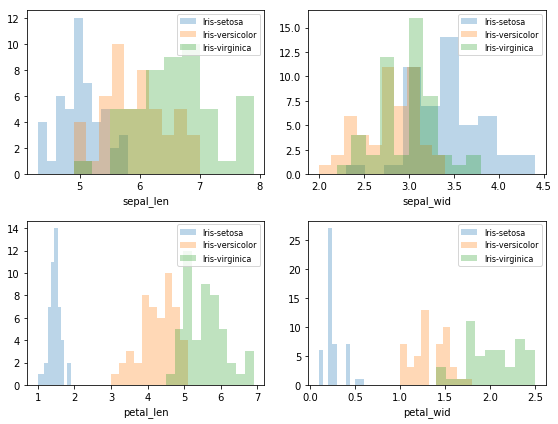

In [21]:
from matplotlib import pyplot as plt
import math

label_dict = {1:'Iris-setosa', 2:'Iris-versicolor', 3:'Iris-virginica'}
feature_dict = {0:'sepal_len',1:'sepal_wid',2:'petal_len',3:'petal_wid'}
plt.figure(figsize=(8,6))
for cnt in range(4):
    plt.subplot(2,2,cnt+1)
    for i, lab in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
        plt.hist(X[y == lab, cnt], bins=10, alpha=0.3,label=label_dict[i+1])
        plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
        
plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [27]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec)/(X_std.shape[0]-1)
print('Convariance matrix \n%s' %cov_mat)

Convariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [28]:
print('Numpy convariance matrix:\n%s' %np.cov(X_std.T))

Numpy convariance matrix:
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [32]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors\n%s' %eig_vecs)
print('Eigenvalues\n%s' %eig_vals)

Eigenvectors
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]
Eigenvalues
[ 2.92442837  0.93215233  0.14946373  0.02098259]


In [34]:
# make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#  sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
print(eig_pairs)

print('Eigenvalue in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

[(2.9244283691111144, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.93215233025350641, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813314, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270606, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
Eigenvalue in decreasing order:

2.92442836911
0.932152330254
0.149463734898
0.0209825927643


In [35]:
# print('Variance explained:\n')
# eigv_sum = sum(eig_vals)
# for i, j in enumerate(eig_pairs):
#     print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.620033326920336, 23.147406858644135, 3.7115155645845164, 0.52104424985101538]


array([  72.62003333,   95.76744019,   99.47895575,  100.        ])

In [36]:
a = np.array([1,2,3,4])
print(a)
print('-----------------')
print(np.cumsum(a))

[1 2 3 4]
-----------------
[ 1  3  6 10]


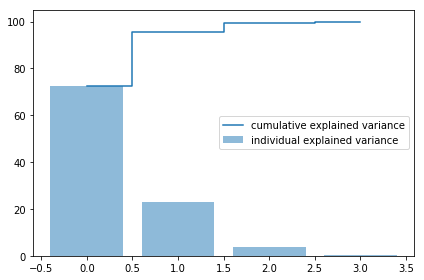

In [44]:
plt.figure(figsize=(6,4))
plt.bar(range(4), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',label='cumulative explained variance')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
matrix_W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_W.real)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [41]:
Y = X_std.dot(matrix_W)
Y

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

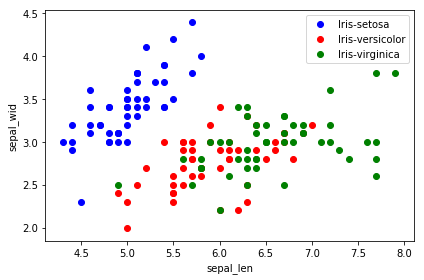

In [46]:
plt.figure(figsize=(6,4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('blue', 'red', 'green')):
    plt.scatter(X[y==lab, 0],X[y==lab, 1],label=lab, c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

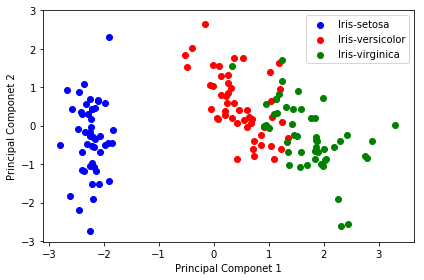

In [47]:
plt.figure(figsize=(6,4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('blue', 'red', 'green')):
    plt.scatter(Y[y==lab, 0],Y[y==lab, 1],label=lab, c=col)
plt.xlabel('Principal Componet 1')
plt.ylabel('Principal Componet 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()